In [1]:
import sys
sys.path.insert(0, '../src/')
import pandas as pd
import numpy as np
from ploting import *
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
data = pd.read_csv('../data/IPD-under-5-years-2015-Council.csv')

In [3]:
data.head()

,Council,Acute Diarrhoea (<14 Days),Acute Ear Infection,Acute Flaccid Paralysis,Acute Glumerulonephritis,Animal Bite (Suspected Rabies),Animal Bites (No Suspected Rabies),Anthrax,Birth Asphyxia,Bronchial Asthma,...,Skin Infections,Soil Transmitted Helminths,Substance Abuse,Symptomatic Hiv Infection,Thyroid Diseases,Tuberculosis,Typhoid,Upper Respiratory Infections,Urinary Tract Infections,Viral Haemorrhagic Fevers
0,Arusha CC,521,17,0,2,0,2,3,665,56,...,24,1,0,42,0,42,5,436,163,0
1,Arusha DC,168,0,0,0,0,0,0,50,20,...,11,0,0,14,1,9,0,94,10,0
2,Karatu DC,125,8,1,1,0,3,0,6,33,...,4,1,0,2,1,6,31,309,54,0
3,Longido DC,24,1,0,0,0,0,0,0,9,...,1,0,0,0,1,1,0,21,8,0
4,Meru DC,115,6,3,1,0,4,2,27,6,...,17,10,0,4,0,4,1,80,74,0


### Check for Missing value
Let's use ["Missingno" package](https://github.com/ResidentMario/missingno) which is a most useful and convenient tool in visualising missing values in the dataset. 

In [4]:
import missingno as msno

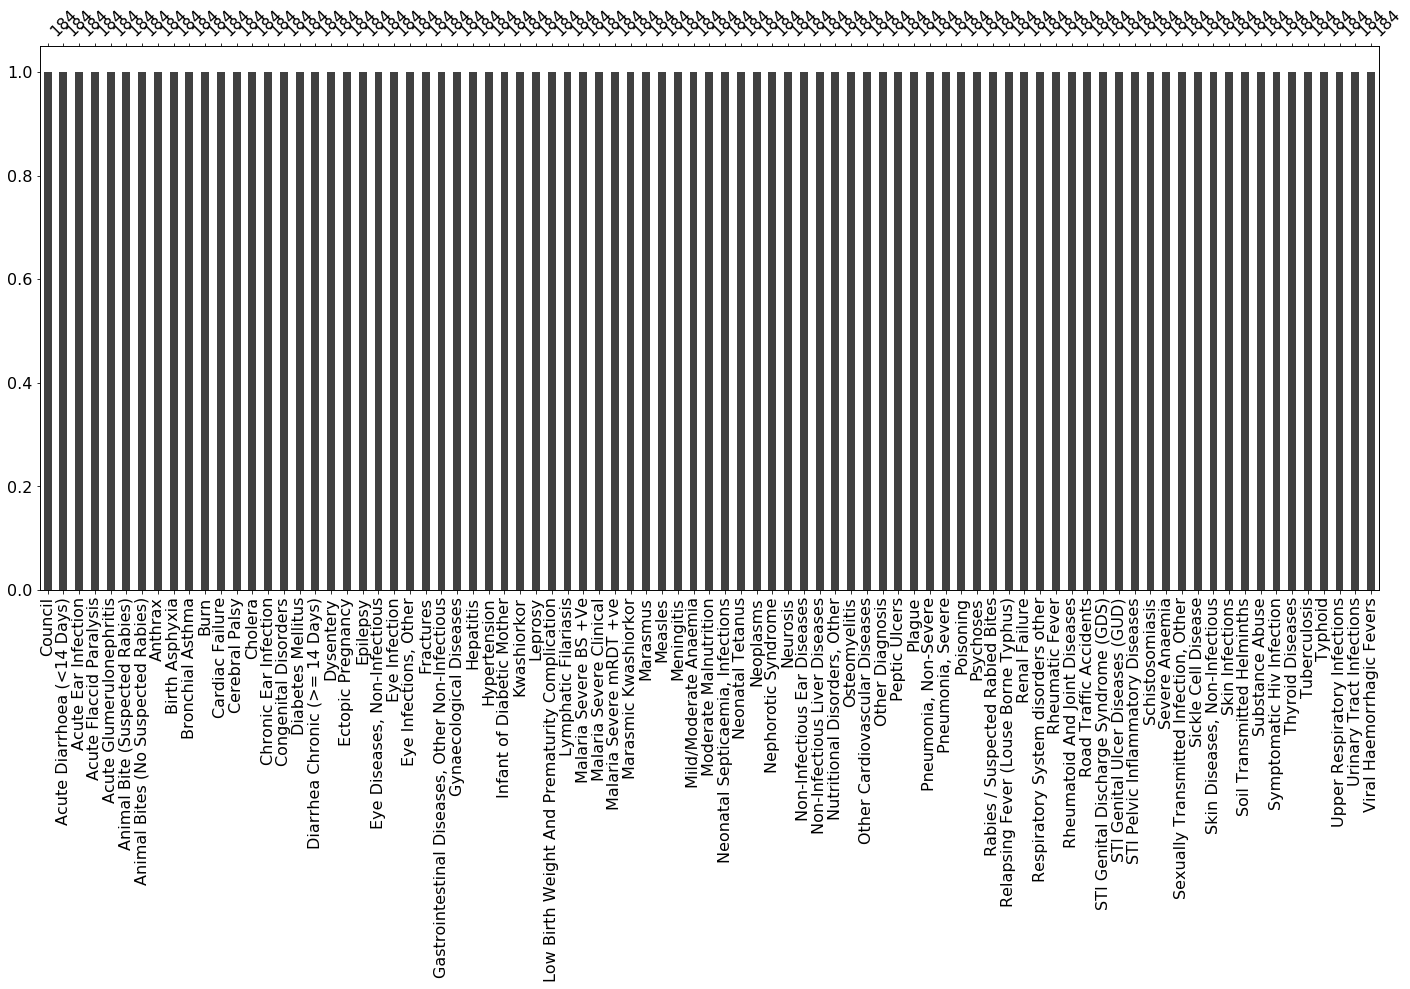

In [5]:
# A simple visualization of nullity by column
msno.bar(df=data)

From the figure above our data is clean, there is no missing values. Alternatevely you can check if the data have missing values using the following command.

In [6]:
# Check for missing values
data.isnull().any()

Council                                            False
Acute Diarrhoea (<14 Days)                         False
Acute Ear Infection                                False
Acute Flaccid Paralysis                            False
Acute Glumerulonephritis                           False
Animal Bite (Suspected Rabies)                     False
Animal Bites (No Suspected Rabies)                 False
Anthrax                                            False
Birth Asphyxia                                     False
Bronchial Asthma                                   False
Burn                                               False
Cardiac Failure                                    False
Cerebral Palsy                                     False
Cholera                                            False
Chronic Ear Infection                              False
Congenital Disorders                               False
Diabetes Mellitus                                  False
Diarrhea Chronic (>= 14 Days)  

## Number of variables and their data types

In [7]:
column=data.columns
print(column)

Index(['Council', 'Acute Diarrhoea (<14 Days)', 'Acute Ear Infection',
       'Acute Flaccid Paralysis', 'Acute Glumerulonephritis',
       'Animal Bite (Suspected Rabies)', 'Animal Bites (No Suspected Rabies)',
       'Anthrax', 'Birth Asphyxia', 'Bronchial Asthma', 'Burn',
       'Cardiac Failure', 'Cerebral Palsy', 'Cholera', 'Chronic Ear Infection',
       'Congenital Disorders', 'Diabetes Mellitus',
       'Diarrhea Chronic (>= 14 Days)', 'Dysentery', 'Ectopic Pregnancy',
       'Epilepsy', 'Eye Diseases, Non-Infectious', 'Eye Infection',
       'Eye Infections, Other', 'Fractures',
       'Gastrointestinal Diseases, Other Non-Infectious',
       'Gynaecological Diseases', 'Hepatitis', 'Hypertension',
       'Infant of Diabetic Mother', 'Kwashiorkor', 'Leprosy',
       'Low Birth Weight And Prematurity Complication', 'Lymphatic Filariasis',
       'Malaria Severe BS +Ve', 'Malaria Severe Clinical',
       'Malaria Severe mRDT +ve', 'Marasmic Kwashiorkor', 'Marasmus',
       'Measl

In [8]:
print ("There are {0} columns and {1} rows".format(len(column), len(data)))

There are 85 columns and 184 rows


In [9]:
data.dtypes

Council                                            object
Acute Diarrhoea (<14 Days)                          int64
Acute Ear Infection                                 int64
Acute Flaccid Paralysis                             int64
Acute Glumerulonephritis                            int64
Animal Bite (Suspected Rabies)                      int64
Animal Bites (No Suspected Rabies)                  int64
Anthrax                                             int64
Birth Asphyxia                                      int64
Bronchial Asthma                                    int64
Burn                                                int64
Cardiac Failure                                     int64
Cerebral Palsy                                      int64
Cholera                                             int64
Chronic Ear Infection                               int64
Congenital Disorders                                int64
Diabetes Mellitus                                   int64
Diarrhea Chron

 With exception to Council column all other columns are integers

## EDA

### DescriptiveStatistics

In [14]:
data.describe()

,Acute Diarrhoea (<14 Days),Acute Ear Infection,Acute Flaccid Paralysis,Acute Glumerulonephritis,Animal Bite (Suspected Rabies),Animal Bites (No Suspected Rabies),Anthrax,Birth Asphyxia,Bronchial Asthma,Burn,...,Skin Infections,Soil Transmitted Helminths,Substance Abuse,Symptomatic Hiv Infection,Thyroid Diseases,Tuberculosis,Typhoid,Upper Respiratory Infections,Urinary Tract Infections,Viral Haemorrhagic Fevers
count,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,293.032609,8.244565,6.179348,0.847826,0.0,3.353261,0.179348,50.157609,19.711957,34.907609,...,16.168478,12.168478,0.0,13.554348,2.413043,6.369565,22.157609,109.652174,158.277174,1.190217
std,272.966178,28.225284,60.763587,2.853183,0.0,10.181961,1.084117,159.502033,30.890936,41.535253,...,35.852596,39.814171,0.0,21.558848,7.922648,12.588239,50.493544,215.486154,226.685055,9.654791
min,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.000000,10.750000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,15.750000,33.750000,0.000000
50%,198.000000,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,5.000000,8.000000,26.000000,...,6.000000,1.000000,0.0,5.000000,0.000000,2.000000,5.000000,54.500000,77.500000,0.000000
75%,419.500000,6.000000,0.000000,0.250000,0.0,3.000000,0.000000,25.250000,21.000000,42.250000,...,14.000000,9.000000,0.0,16.250000,1.000000,7.000000,26.000000,114.250000,173.000000,0.000000
max,1400.000000,229.000000,819.000000,25.000000,0.0,113.000000,13.000000,1358.000000,186.000000,266.000000,...,263.000000,473.000000,0.0,132.000000,88.000000,95.000000,487.000000,1874.000000,1579.000000,129.000000


In [ ]:
latexify(fig_width=12)
data.mean().plot(kind='bar')
plt.title("Mean Disease Distribution")
plt.ylabel("Number of Incidence")
plt.savefig("../figure/mean_dist.png", dpi=1200)

It clear that Malari is the leading disease with larger incidences reported

In [24]:
data.groupby('Council')[['Malaria Severe BS +Ve']].mean().sort_values(by=['Malaria Severe BS +Ve'], ascending=False)

,Malaria Severe BS +Ve
Council,
Ngara DC,4415
Morogoro MC,4241
Nzega DC,4004
Kilosa DC,3626
Songea DC,3571
Kahama TC,3469
Nyamagana MC,3344
Missenyi DC,3335
Tabora MC,3318
